In [6]:
!pip install tensorflow

In [7]:
import pandas as pd
import tensorflow as tf

In [8]:
!pip install keras

In [9]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [10]:
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# **EDA**

In [11]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [13]:
# Dropping columns which are not required
df = df.drop(df.iloc[:,11:30].columns, axis = 1)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [ ]:
df["month"].unique()

In [15]:
#month and day changes to numeric
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [16]:
# Encoding target variable 'size category'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["size_category"] = le.fit_transform(df["size_category"])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [17]:
#StandardScaler: Standardization
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

In [18]:
df.iloc[:,2:11] = se.fit_transform(df.iloc[:,2:11])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1
1,10,2,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,1
2,10,6,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,1
3,3,5,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1
4,3,7,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0
513,8,7,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0
514,8,7,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0
515,8,6,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,1


In [19]:
x = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [20]:
x.shape

(517, 11)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
X_train.shape

(413, 11)

# **Model Building**

In [24]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=11,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [25]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Fit the model
h = model.fit(X_train, Y_train, validation_split=0.2, epochs=70, batch_size=30)

# evaluate the model on train data
scores = model.evaluate(X_train, Y_train)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/70
11/11 [==============================] - 1s 27ms/step - loss: 2.1147 - accuracy: 0.2667 - val_loss: 1.9668 - val_accuracy: 0.2771
Epoch 2/70
11/11 [==============================] - 0s 5ms/step - loss: 1.7035 - accuracy: 0.2788 - val_loss: 1.5870 - val_accuracy: 0.2892
Epoch 3/70
11/11 [==============================] - 0s 5ms/step - loss: 1.3881 - accuracy: 0.2970 - val_loss: 1.2824 - val_accuracy: 0.3253
Epoch 4/70
11/11 [==============================] - 0s 7ms/step - loss: 1.1362 - accuracy: 0.3273 - val_loss: 1.0378 - val_accuracy: 0.3373
Epoch 5/70
11/11 [==============================] - 0s 6ms/step - loss: 0.9212 - accuracy: 0.3455 - val_loss: 0.8404 - val_accuracy: 0.3373
Epoch 6/70
11/11 [==============================] - 0s 7ms/step - loss: 0.7543 - accuracy: 0.4182 - val_loss: 0.6997 - val_accuracy: 0.4699
Epoch 7/70
11/11 [==============================] - 0s 7ms/step - loss: 0.6438 - accuracy: 0.6364 - val_loss: 0.6317 - val_accuracy: 0.6867
Epoch 8/70
11/11 [=

In [27]:
# Visualize training history

# list all data in history
h.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

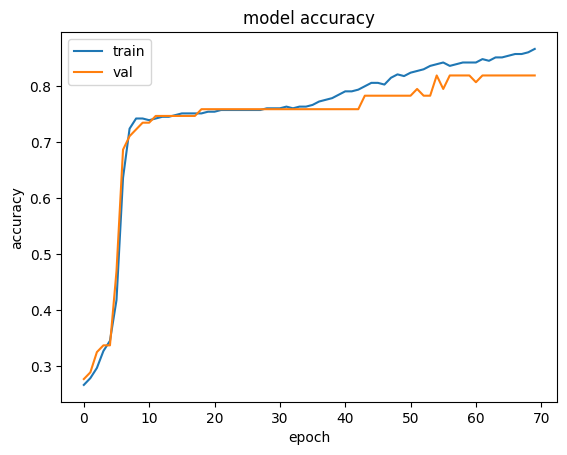

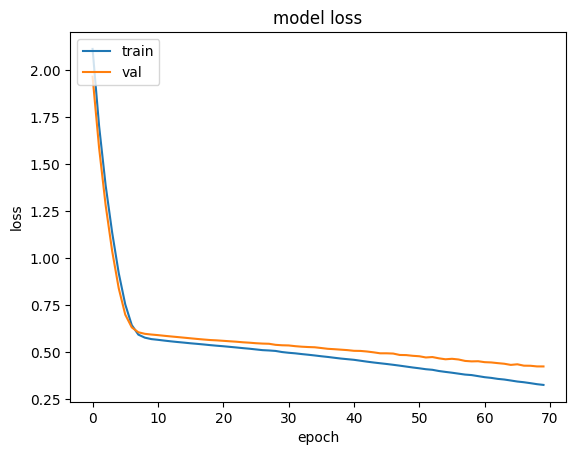

In [28]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [29]:
# evaluate the model on test data
scores =model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 7ms/step - loss: 0.3536 - accuracy: 0.8654
accuracy: 86.54%


# **Hyperparameter Tuning**

In [30]:
!pip install scikeras

In [31]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.optimizers import Adam
#from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam

In [33]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [30,40,50]
epochs = [70,90,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END .....batch_size=30, epochs=70;, score=1.000 total time=   3.0s
[CV 2/5; 1/9] START batch_size=30, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END .....batch_size=30, epochs=70;, score=0.856 total time=   6.3s
[CV 3/5; 1/9] START batch_size=30, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END .....batch_size=30, epochs=70;, score=0.883 total time=   3.5s
[CV 4/5; 1/9] START batch_size=30, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END .....batch_size=30, epochs=70;, score=0.883 total time=   2.8s
[CV 5/5; 1/9] START batch_size=30, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END .....batch_size=30, epochs=70;, score=0.864 total time=   3.3s
[CV 1/5; 2/9] START batch_size=30, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END .....batch_size=30, epochs=90;, score=1.000 total time=   6.4s
[CV 2/5; 2/9] START batch_size=30, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END .....batch_size=30, epochs=90;, score=0.904 total time=   3.3s
[CV 3/5; 2/9] START batch_size=30, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END .....batch_size=30, epochs=90;, score=0.913 total time=   3.6s
[CV 4/5; 2/9] START batch_size=30, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END .....batch_size=30, epochs=90;, score=0.903 total time=   6.4s
[CV 5/5; 2/9] START batch_size=30, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END .....batch_size=30, epochs=90;, score=0.883 total time=   3.3s
[CV 1/5; 3/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ....batch_size=30, epochs=100;, score=0.990 total time=   3.6s
[CV 2/5; 3/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END ....batch_size=30, epochs=100;, score=0.962 total time=   6.4s
[CV 3/5; 3/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ....batch_size=30, epochs=100;, score=0.981 total time=   3.5s
[CV 4/5; 3/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ....batch_size=30, epochs=100;, score=0.893 total time=   6.7s
[CV 5/5; 3/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ....batch_size=30, epochs=100;, score=0.903 total time=   6.3s
[CV 1/5; 4/9] START batch_size=40, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END .....batch_size=40, epochs=70;, score=0.990 total time=   3.5s
[CV 2/5; 4/9] START batch_size=40, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END .....batch_size=40, epochs=70;, score=0.769 total time=   3.5s
[CV 3/5; 4/9] START batch_size=40, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END .....batch_size=40, epochs=70;, score=0.864 total time=   2.8s
[CV 4/5; 4/9] START batch_size=40, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END .....batch_size=40, epochs=70;, score=0.883 total time=   3.5s
[CV 5/5; 4/9] START batch_size=40, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END .....batch_size=40, epochs=70;, score=0.854 total time=   3.5s
[CV 1/5; 5/9] START batch_size=40, epochs=90....................................
[CV 1/5; 5/9] END .....batch_size=40, epochs=90;, score=0.981 total time=   3.5s
[CV 2/5; 5/9] START batch_size=40, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END .....batch_size=40, epochs=90;, score=0.904 total time=   3.8s
[CV 3/5; 5/9] START batch_size=40, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END .....batch_size=40, epochs=90;, score=0.932 total time=   3.8s
[CV 4/5; 5/9] START batch_size=40, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END .....batch_size=40, epochs=90;, score=0.903 total time=   2.9s
[CV 5/5; 5/9] START batch_size=40, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END .....batch_size=40, epochs=90;, score=0.883 total time=   3.5s
[CV 1/5; 6/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ....batch_size=40, epochs=100;, score=0.990 total time=   3.7s
[CV 2/5; 6/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END ....batch_size=40, epochs=100;, score=0.904 total time=   3.5s
[CV 3/5; 6/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ....batch_size=40, epochs=100;, score=0.942 total time=   3.0s
[CV 4/5; 6/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ....batch_size=40, epochs=100;, score=0.903 total time=   6.1s
[CV 5/5; 6/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ....batch_size=40, epochs=100;, score=0.913 total time=   3.5s
[CV 1/5; 7/9] START batch_size=50, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END .....batch_size=50, epochs=70;, score=0.990 total time=   2.2s
[CV 2/5; 7/9] START batch_size=50, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END .....batch_size=50, epochs=70;, score=0.750 total time=   2.8s
[CV 3/5; 7/9] START batch_size=50, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END .....batch_size=50, epochs=70;, score=0.738 total time=   3.8s
[CV 4/5; 7/9] START batch_size=50, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END .....batch_size=50, epochs=70;, score=0.835 total time=   3.6s
[CV 5/5; 7/9] START batch_size=50, epochs=70....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END .....batch_size=50, epochs=70;, score=0.825 total time=   2.2s
[CV 1/5; 8/9] START batch_size=50, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END .....batch_size=50, epochs=90;, score=1.000 total time=   3.5s
[CV 2/5; 8/9] START batch_size=50, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END .....batch_size=50, epochs=90;, score=0.788 total time=   3.3s
[CV 3/5; 8/9] START batch_size=50, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END .....batch_size=50, epochs=90;, score=0.864 total time=   3.2s
[CV 4/5; 8/9] START batch_size=50, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END .....batch_size=50, epochs=90;, score=0.883 total time=   3.5s
[CV 5/5; 8/9] START batch_size=50, epochs=90....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END .....batch_size=50, epochs=90;, score=0.864 total time=   2.6s
[CV 1/5; 9/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ....batch_size=50, epochs=100;, score=0.990 total time=   2.8s
[CV 2/5; 9/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END ....batch_size=50, epochs=100;, score=0.788 total time=   6.4s
[CV 3/5; 9/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ....batch_size=50, epochs=100;, score=0.845 total time=   2.7s
[CV 4/5; 9/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ....batch_size=50, epochs=100;, score=0.883 total time=   2.7s
[CV 5/5; 9/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ....batch_size=50, epochs=100;, score=0.883 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [36]:
grid_result.best_score_

0.9457244212098581

In [37]:
grid_result.best_params_

{'batch_size': 30, 'epochs': 100}